In [ ]:
%cd drive/MyDrive/pythonlibs

/content/drive/MyDrive/pythonlibs


In [ ]:
! pip install wandb
! pip install xgboost

In [ ]:
import wandb
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

In [ ]:
wandb.init(project="NHANES XGBOOST")

wandb: Currently logged in as: benchay (use `wandb login --relogin` to force relogin)


In [ ]:
df = pd.read_pickle('../nhanes_data/final_df_xgboost_without_ohx_nan_preprocessed.pkl') # df w.o./ oharnf & nans preprocessed by Chay 
# df = pd.read_pickle('../nhanes_data/final_df_xgboost_with_ohx_nan_preprocessed.pkl') #df w/ oharnf & nans preprocessed by Chay 
# df = pd.read_pickle('../nhanes_data/final_df_xgboost_without_ohx.pkl') # df w.o./ oharnf & nans left for xgboost
# df = pd.read_pickle('../nhanes_data/final_df_xgboost_with_ohx.pkl') # df w/ oharnf & nans left for xgboost
y = np.fromfile('../nhanes_data/label.dat')


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, stratify=y)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {'max_depth' : [2,3,4,5,6,7,8,9,10],
          'eta' : [0.1,0.2,0.3,0.4,0.5,0.6,1],
          'nthread' : [5],
          'eval_metric' : ['auc']}

In [ ]:
num_round = 20
xgbclf = xgb.XGBClassifier()
clf = GridSearchCV(estimator=xgbclf, param_grid=params, cv=5, verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV 1/5] END eta=0.1, eval_metric=auc, max_depth=2, nthread=5;, score=0.735 total time=   5.3s
[CV 2/5] END eta=0.1, eval_metric=auc, max_depth=2, nthread=5;, score=0.734 total time=   5.3s
[CV 3/5] END eta=0.1, eval_metric=auc, max_depth=2, nthread=5;, score=0.744 total time=   5.5s
[CV 4/5] END eta=0.1, eval_metric=auc, max_depth=2, nthread=5;, score=0.738 total time=   5.5s
[CV 5/5] END eta=0.1, eval_metric=auc, max_depth=2, nthread=5;, score=0.746 total time=   5.3s
[CV 1/5] END eta=0.1, eval_metric=auc, max_depth=3, nthread=5;, score=0.744 total time=   7.1s
[CV 2/5] END eta=0.1, eval_metric=auc, max_depth=3, nthread=5;, score=0.732 total time=   7.1s
[CV 3/5] END eta=0.1, eval_metric=auc, max_depth=3, nthread=5;, score=0.742 total time=   7.1s
[CV 4/5] END eta=0.1, eval_metric=auc, max_depth=3, nthread=5;, score=0.741 total time=   7.1s
[CV 5/5] END eta=0.1, eval_metric=auc, max_depth=3, nthread=5;, score=0.743 total t

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1],
                         'eval_metric': ['auc'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'nthread': [5]},
             verbose=3)

In [ ]:
bst = clf.best_estimator_
bst_params = clf.best_params_

In [ ]:
bst.save_model('../ml_models/ensemble/xgboost/preprocessed_max_depth{}_eta{}_nthread{}_eval_metric{}_num_round{}.model'.format(bst_params['max_depth'],
                                                                                                                              bst_params['eta'],
                                                                                                                        
                                                                                                                              bst_params['nthread'],
                                                                                                                              bst_params['eval_metric'],
                                                                                                                              num_round
                                                                                                                              ))

In [ ]:
y_pred = bst.predict(X_test)

In [ ]:
(y_test==y_pred).astype(float).mean()

0.7533753375337534

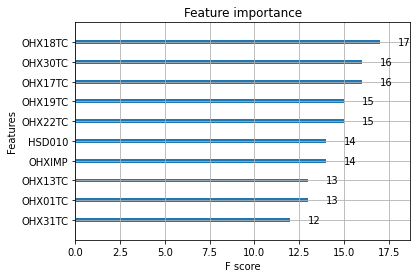

In [ ]:
xgb.plot_importance(bst, max_num_features=10)

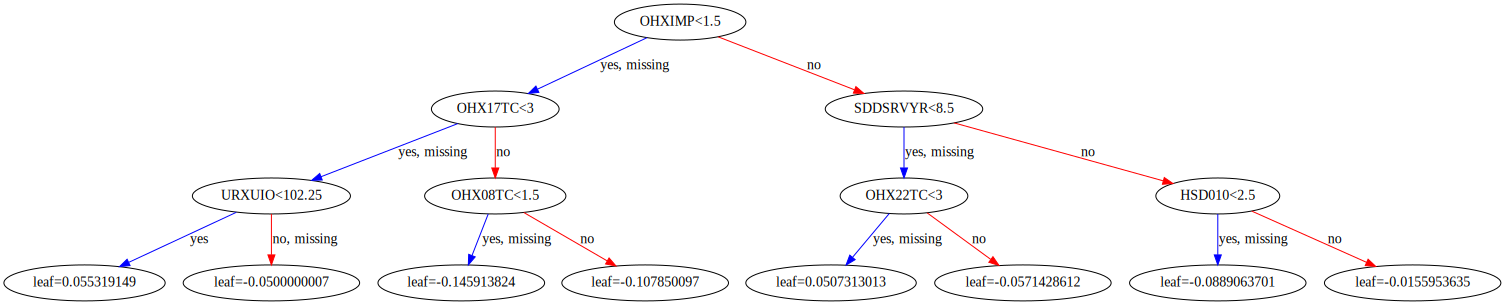

In [ ]:
xgb.to_graphviz(bst)